#### **SMA LAB**

Name - Mohd Zaki Mehtab Qureshi<br>
Roll No. - 19CO40<br>
Class - BECO<br>
Sem - 8<br>

# **Experiment No. 5**

Develop Content (text, emoticons, image, audio, video) based social media analytics model for business.
(e.g. Content Based Analysis: Topic, Issue, Trend, sentiment/opinion analysis,
audio, video, image analytics)

# **Twitter Data Analytics**

In [1]:
# !pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git
!pip install snscrape --user --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter
import datetime
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
sns.set_theme(style="whitegrid")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Taking user input

In [3]:
text = input('Enter query text to be matched (or leave it blank by pressing enter)')
username = input('Enter specific username(s) from a twitter account without @ (or leave it blank by pressing enter): ')
since = input('Enter startdate in this format yyyy-mm-dd (or leave it blank by pressing enter): ')
until = input('Enter enddate in this format yyyy-mm-dd (or leave it blank by pressing enter): ')
count = int(input('Enter max number of tweets or enter -1 to retrieve all possible tweets: '))
retweet = input('Exclude Retweets? (y/n): ')
replies = input('Exclude Replies? (y/n): ')

Enter query text to be matched (or leave it blank by pressing enter)
Enter specific username(s) from a twitter account without @ (or leave it blank by pressing enter): Airbus
Enter startdate in this format yyyy-mm-dd (or leave it blank by pressing enter): 2022-04-11
Enter enddate in this format yyyy-mm-dd (or leave it blank by pressing enter): 2023-04-11
Enter max number of tweets or enter -1 to retrieve all possible tweets: -1
Exclude Retweets? (y/n): y
Exclude Replies? (y/n): n


# List of Fields which we can Scrape using this Library

- url: str
- date: datetime.datetime
- rawContent: str
- renderedContent: strvijaysalesofficial
- id: int
- user: 'User'
- replyCount: int
- retweetCount: int
- likeCount: int
- quoteCount: int
- conversationId: int
- lang: str
- source: str
- sourceUrl: typing.Optional[str] = None
- sourceLabel: typing.Optional[str] = None
- links: typing.Optional[typing.List['TextLink']] = None
- media: typing.Optional[typing.List['Medium']] = None
- retweetedTweet: typing.Optional['Tweet'] = None
- quotedTweet: typing.Optional['Tweet'] = None
- inReplyToTweetId: typing.Optional[int] = None
- inReplyToUser: typing.Optional['User'] = None
- mentionedUsers: typing.Optional[typing.List['User']] = None
- coordinates: typing.Optional['Coordinates'] = None
- place: typing.Optional['Place'] = None
- hashtags: typing.Optional[typing.List[str]] = None
- cashtags: typing.Optional[typing.List[str]] = None
- card: typing.Optional['Card'] = None

In [4]:
def search(text,username,since,until,retweet,replies):
    global filename
    q = text
    if username!='':
        q += f" from:{username}"    
    if until=='':
        until = datetime.datetime.strftime(datetime.date.today(), '%Y-%m-%d')
    q += f" until:{until}"
    if since=='':
        since = datetime.datetime.strftime(datetime.datetime.strptime(until, '%Y-%m-%d') - datetime.timedelta(days=7), '%Y-%m-%d')
    q += f" since:{since}"
    if retweet == 'y':
        q += f" exclude:retweets"
    if replies == 'y':
        q += f" exclude:replies"
    if username!='' and text!='':
        filename = f"{since}_{until}_{username}_{text}.csv"
    elif username!="":
        filename = f"{since}_{until}_{username}.csv"
    else:
        filename = f"{since}_{until}_{text}.csv"
    print(filename)
    return q

In [5]:
from tqdm.notebook import tqdm

In [6]:
q = search(text,username,since,until,retweet,replies)
# Creating list to append tweet data 
tweets_list1 = []
# Using TwitterSearchScraper to scrape data and append tweets to list
if count == -1:
    for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(q).get_items())):
        tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username,tweet.lang,
        tweet.hashtags,tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.media])
else:
    with tqdm_notebook(total=count) as pbar:
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()): #declare a username 
            if i>=count: #number of tweets you want to scrape
                break
            tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username,tweet.lang,
        tweet.hashtags,tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.media])
            pbar.update(1)
# Creating a dataframe from the tweets list above 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['DateTime', 'TweetId', 'Text', 'Username','Language', 'Hashtags','ReplyCount','RetweetCount','LikeCount','QuoteCount','Media'])

2022-04-11_2023-04-11_Airbus.csv


0it [00:00, ?it/s]

In [7]:
tweets_df1.sort_values(by='DateTime',ascending=False).head(3)

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media
0,2023-03-30 14:27:14+00:00,1641446994534338570,📅 It's 3/30 aka #A330 Day! Flying on routes fr...,Airbus,en,"[A330, A330]",7,43,254,6,[Video(thumbnailUrl='https://pbs.twimg.com/med...
1,2023-03-30 11:29:11+00:00,1641402184444137473,📅 What day is it? It's 3/30 aka #A330 Day! Fin...,Airbus,en,"[A330, A330neo, Airspace]",9,49,318,8,[Video(thumbnailUrl='https://pbs.twimg.com/med...
2,2023-03-30 08:27:28+00:00,1641356455637925893,📅 What day is it? It's 3/30 aka #A330 Day! In ...,Airbus,en,[A330],5,67,414,8,[Video(thumbnailUrl='https://pbs.twimg.com/med...


## Data Preprocessing

In [8]:
tweets_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   DateTime      212 non-null    datetime64[ns, UTC]
 1   TweetId       212 non-null    int64              
 2   Text          212 non-null    object             
 3   Username      212 non-null    object             
 4   Language      212 non-null    object             
 5   Hashtags      180 non-null    object             
 6   ReplyCount    212 non-null    int64              
 7   RetweetCount  212 non-null    int64              
 8   LikeCount     212 non-null    int64              
 9   QuoteCount    212 non-null    int64              
 10  Media         143 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 18.3+ KB


## Adding more columns for time-series analysis

In [9]:
tweets_df1['Hour'] = tweets_df1['DateTime'].dt.hour
tweets_df1['Year'] = tweets_df1['DateTime'].dt.year  
tweets_df1['Month'] = tweets_df1['DateTime'].dt.month
tweets_df1['MonthName'] = tweets_df1['DateTime'].dt.month_name()
tweets_df1['MonthDay'] = tweets_df1['DateTime'].dt.day
tweets_df1['DayName'] = tweets_df1['DateTime'].dt.day_name()
tweets_df1['Week'] = tweets_df1['DateTime'].dt.isocalendar().week

## Splitting timestamp column into separate date and time columns 

In [10]:
tweets_df1['Date'] = [d.date() for d in tweets_df1['DateTime']]
tweets_df1['Time'] = [d.time() for d in tweets_df1['DateTime']]

## Dropping DateTime Column

In [11]:
tweets_df1.drop('DateTime',axis=1,inplace=True)
tweets_df1

,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,Hour,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time
0,1641446994534338570,📅 It's 3/30 aka #A330 Day! Flying on routes fr...,Airbus,en,"[A330, A330]",7,43,254,6,[Video(thumbnailUrl='https://pbs.twimg.com/med...,14,2023,3,March,30,Thursday,13,2023-03-30,14:27:14
1,1641402184444137473,📅 What day is it? It's 3/30 aka #A330 Day! Fin...,Airbus,en,"[A330, A330neo, Airspace]",9,49,318,8,[Video(thumbnailUrl='https://pbs.twimg.com/med...,11,2023,3,March,30,Thursday,13,2023-03-30,11:29:11
2,1641356455637925893,📅 What day is it? It's 3/30 aka #A330 Day! In ...,Airbus,en,[A330],5,67,414,8,[Video(thumbnailUrl='https://pbs.twimg.com/med...,8,2023,3,March,30,Thursday,13,2023-03-30,08:27:28
3,1641005811777282049,Welcome on board @Lufthansa! Great to see you ...,Airbus,en,[FirstMoversCoalition],5,18,203,1,None,9,2023,3,March,29,Wednesday,13,2023-03-29,09:14:08
4,1638182807410298881,What do Airbus and #Paralympic fencer @maximev...,Airbus,en,[Paralympic],2,12,87,0,[Photo(previewUrl='https://pbs.twimg.com/media...,14,2023,3,March,21,Tuesday,12,2023-03-21,14:16:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1518945442393952256,How the #Metaverse can liven up the passenger ...,Airbus,en,[Metaverse],8,11,50,1,None,13,2022,4,April,26,Tuesday,17,2022-04-26,13:29:48
208,1518908497232080896,Paging all pilots 🧑‍✈️👨‍✈️: it's your time to ...,Airbus,en,[WorldPilotsDay],16,157,761,17,[Video(thumbnailUrl='https://pbs.twimg.com/med...,11,2022,4,April,26,Tuesday,17,2022-04-26,11:03:00
209,1517842452069109762,@DaveWallsworth @scottiebateman @SanDiegoAirpo...,Airbus,en,None,0,3,61,0,None,12,2022,4,April,23,Saturday,16,2022-04-23,12:26:55
210,1516811365784199168,And... 𝗜𝗧's 𝗔👌🏻1st flight for @ITAAirways' #A3...,Airbus,en,"[A350, A220, A320neo, A330neo, PaxEx]",10,90,641,7,[Photo(previewUrl='https://pbs.twimg.com/media...,16,2022,4,April,20,Wednesday,16,2022-04-20,16:09:45


## Saving as CSV file

In [12]:
tweets_df1.to_csv(f"{filename}",index=False)

## Loading Saved CSV file

In [15]:
tweets = pd.read_csv("2022-04-11_2023-04-11_Airbus.csv")
tweets.head(2)

,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,Hour,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time
0,1641446994534338570,📅 It's 3/30 aka #A330 Day! Flying on routes fr...,Airbus,en,"['A330', 'A330']",7,43,254,6,[Video(thumbnailUrl='https://pbs.twimg.com/med...,14,2023,3,March,30,Thursday,13,2023-03-30,14:27:14
1,1641402184444137473,📅 What day is it? It's 3/30 aka #A330 Day! Fin...,Airbus,en,"['A330', 'A330neo', 'Airspace']",9,49,318,8,[Video(thumbnailUrl='https://pbs.twimg.com/med...,11,2023,3,March,30,Thursday,13,2023-03-30,11:29:11


## Visualizing Count By Year

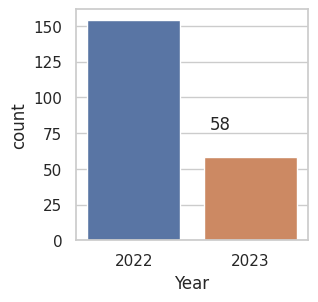

In [16]:
f, ax = plt.subplots(figsize=(3, 3))
sns.countplot(x= tweets['Year'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

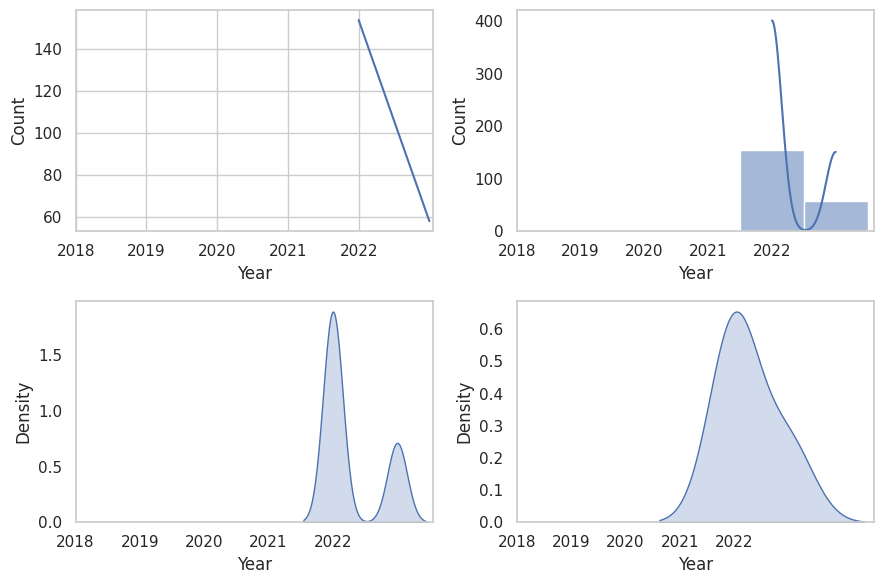

In [17]:
plt.figure(figsize=(9, 6))

ax=plt.subplot(221)
sns.lineplot(tweets.Year.value_counts())
ax.set_xlabel("Year")
ax.set_ylabel('Count')
plt.xticks(np.arange(2018,2023,1))

plt.subplot(222)
sns.histplot(x=tweets.Year,stat='count',binwidth=1,kde='true',discrete=True)
plt.xticks(np.arange(2018,2023,1))
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.Year,fill=True)
plt.xticks(np.arange(2018,2023,1))
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.Year,fill=True,bw_adjust=3)
plt.xticks(np.arange(2018,2023,1))
plt.grid()

plt.tight_layout()
plt.show()

## Visualizing Count By Month

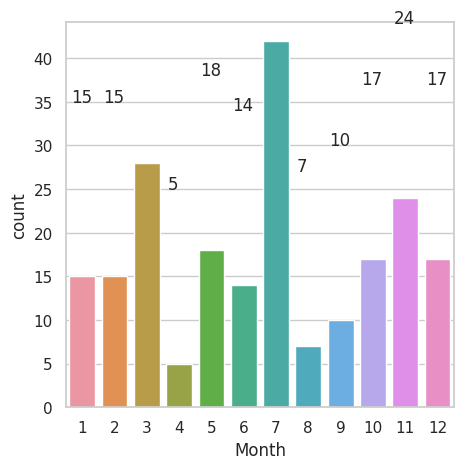

In [18]:
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x= tweets['Month'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

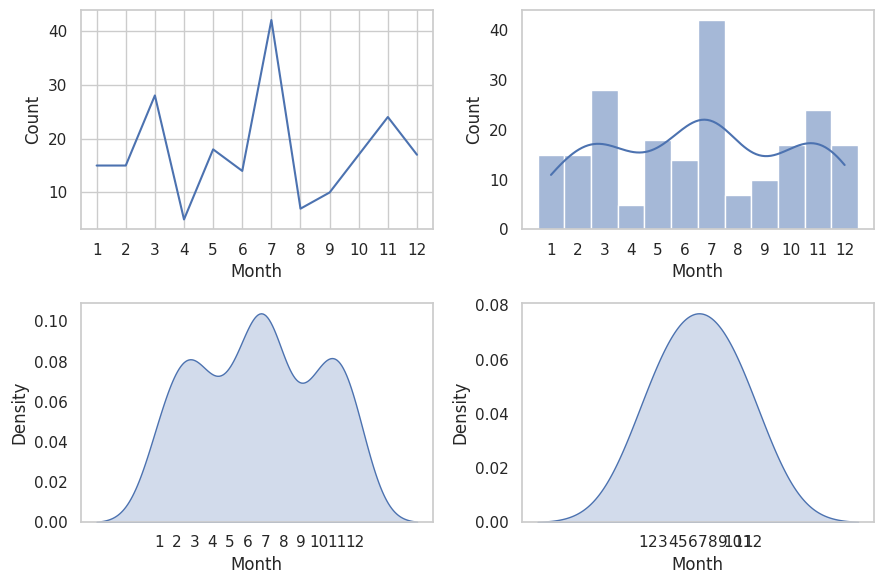

In [19]:
plt.figure(figsize=(9, 6))

ax=plt.subplot(221)
sns.lineplot(tweets.Month.value_counts())
ax.set_xlabel("Month")
ax.set_ylabel('Count')
plt.xticks(np.arange(1,13,1))

plt.subplot(222)
sns.histplot(x=tweets.Month,stat='count',binwidth=1,kde='true',discrete=True)
plt.xticks(np.arange(1,13,1))
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.Month,fill=True)
plt.xticks(np.arange(1,13,1))
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.Month,fill=True,bw_adjust=3)
plt.xticks(np.arange(1,13,1))
plt.grid()

plt.tight_layout()
plt.show()

## Visualizing Count By Week

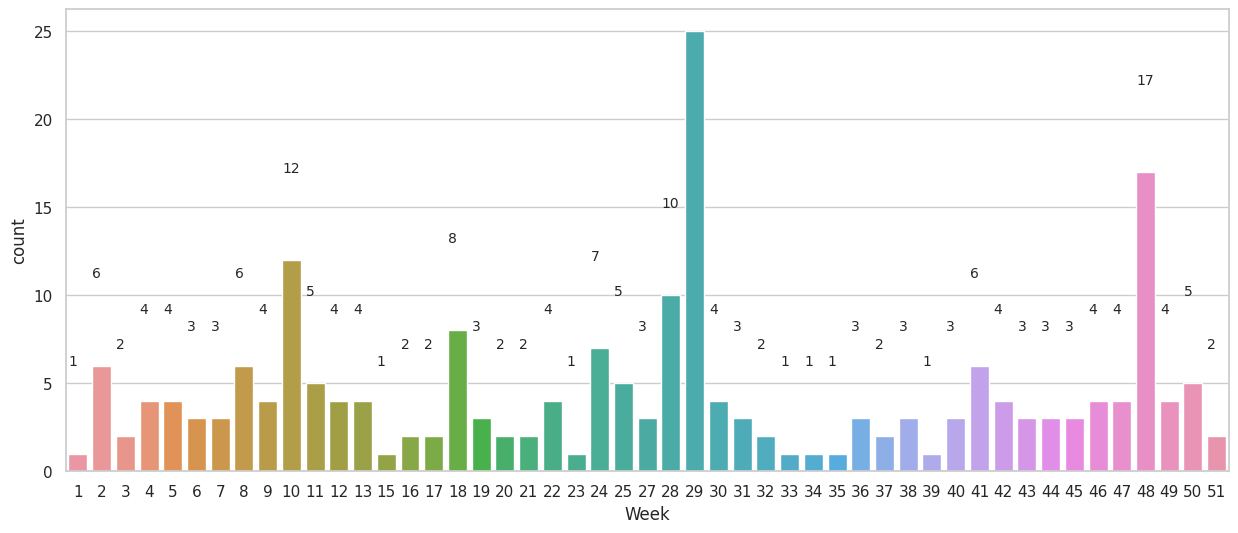

In [20]:
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x= tweets['Week'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.005, p.get_height()+5), fontsize = 10)

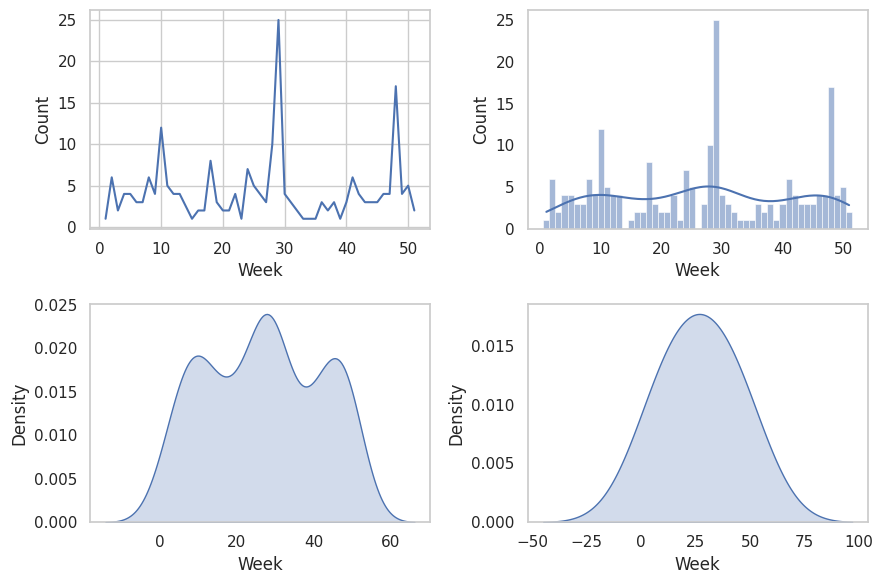

In [21]:
plt.figure(figsize=(9, 6))

ax=plt.subplot(221)
sns.lineplot(tweets.Week.value_counts())
ax.set_xlabel("Week")
ax.set_ylabel('Count')

plt.subplot(222)
sns.histplot(x=tweets.Week,stat='count',binwidth=1,kde='true',discrete=True)
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.Week,fill=True)
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.Week,fill=True,bw_adjust=3)
plt.grid()

plt.tight_layout()
plt.show()

## Visualizing Count By MonthDay

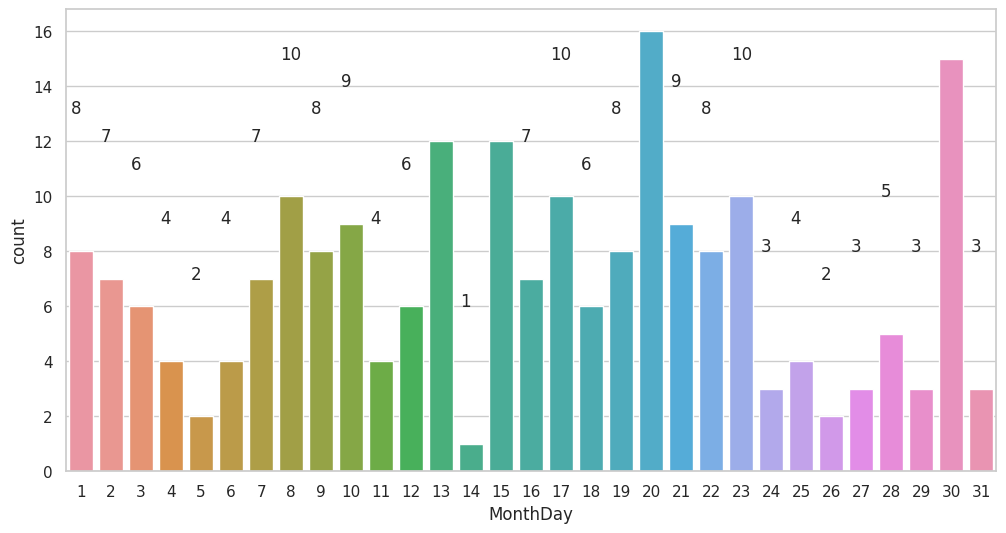

In [22]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x= tweets['MonthDay'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+5), fontsize = 12)

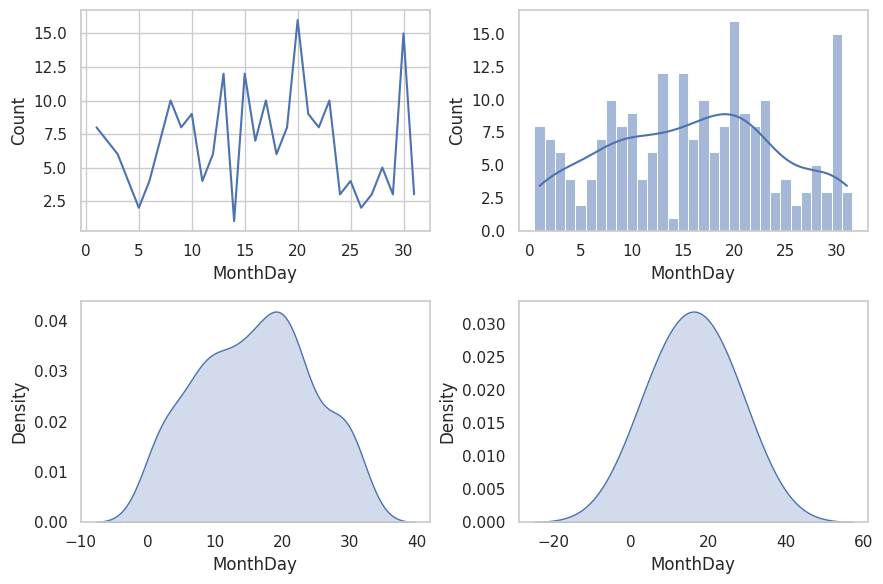

In [23]:
plt.figure(figsize=(9, 6))

ax=plt.subplot(221)
sns.lineplot(tweets.MonthDay.value_counts())
ax.set_xlabel("MonthDay")
ax.set_ylabel('Count')

plt.subplot(222)
sns.histplot(x=tweets.MonthDay,stat='count',binwidth=1,kde='true',discrete=True)
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.MonthDay,fill=True)
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.MonthDay,fill=True,bw_adjust=3)
plt.grid()

plt.tight_layout()
plt.show()

## Visualizing Count By Hour

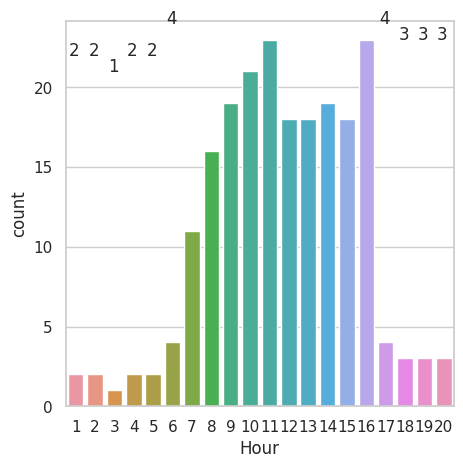

In [24]:
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x= tweets['Hour'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

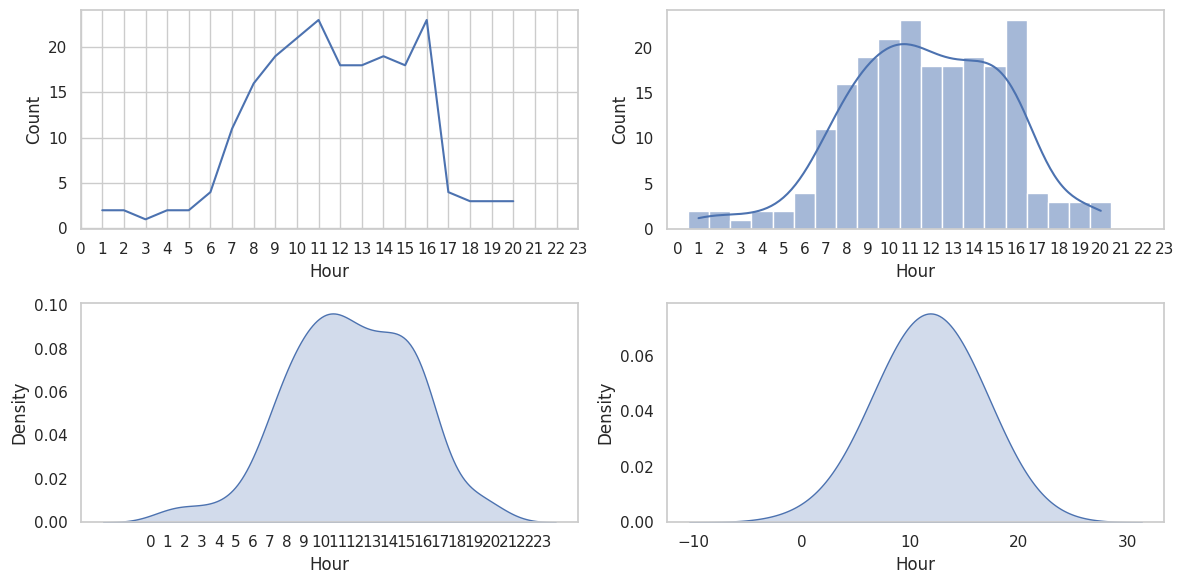

In [25]:
plt.figure(figsize=(12, 6))

ax=plt.subplot(221)
sns.lineplot(tweets.Hour.value_counts())
ax.set_xlabel("Hour")
ax.set_ylabel('Count')
plt.xticks(np.arange(0,24,1))

plt.subplot(222)
sns.histplot(x=tweets.Hour,stat='count',binwidth=1,kde='true',discrete=True)
plt.xticks(np.arange(0,24,1))
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.Hour,fill=True)
plt.xticks(np.arange(0,24,1))
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.Hour,fill=True,bw_adjust=3)
#plt.xticks(np.arange(0,24,1))
plt.grid()

plt.tight_layout()
plt.show()

## Visualizing Most Used HashTags

In [26]:
import string
tags = []
for text in tweets.Hashtags:
  if type(text) == str:
    text = text.rstrip(string.punctuation).lstrip(string.punctuation)
    text = text.replace("'", "")
    tags.extend(text.split(', '))

print(tags)

['A330', 'A330', 'A330', 'A330neo', 'Airspace', 'A330', 'FirstMoversCoalition', 'Paralympic', 'A320', 'A320neo', 'FlyingFurther', 'A320', 'A320neo', 'A320', 'A320neo', 'FrostyFriday', 'A321XLR', 'planespotters', 'A330', 'A321XLR', 'A350F', 'FirstFlight', 'A321', 'FlyFurther', 'A321XLR', 'A321neo', 'A321neo', 'SAF', 'A321neo', 'SAF', 'VOLCAN', 'A321neo', 'A321neo', 'SAF', 'WorldEngineeringDay', 'TeamAirbus', 'hybridisation', 'A350', 'A350', 'A321neo', 'Airbus', 'Airspace', 'FrostyFriday', 'A321XLR', 'A220', 'Airbus', 'A350', 'LongRangeLeader', 'A220', 'A220Day', 'A220', 'A220Day', 'A220', 'A220Day', 'SBTi', 'TeamAirbus', 'WingofTomorrow', 'A321XLR', 'A320neo', 'StayTuned', 'AirbusCareers', 'GlobalMovieDay', 'A220', 'MondayMotivation', 'Airbus', 'A350F', 'A350F', 'InternationalEducationDay', 'BlueMonday', 'A350', 'AirbusUpNext', 'A350', 'Beluga', 'TeamAirbus', 'happynewyear', 'A330', 'A330neo', 'AirspaceCabin', 'A321XLR', 'GenteViva', 'A350', 'A321XLR', 'A321XLR', 'QueenOfTheSkies', 'Int

In [27]:
frequencies = nltk.FreqDist(tags)
frequencies

FreqDist({'A350': 31, 'A220': 23, 'FIA2022': 22, 'AirbusSummit': 17, 'A321XLR': 14, 'A321neo': 13, 'A330neo': 12, 'A330': 11, 'AirspaceCabin': 11, 'A350F': 8, ...})

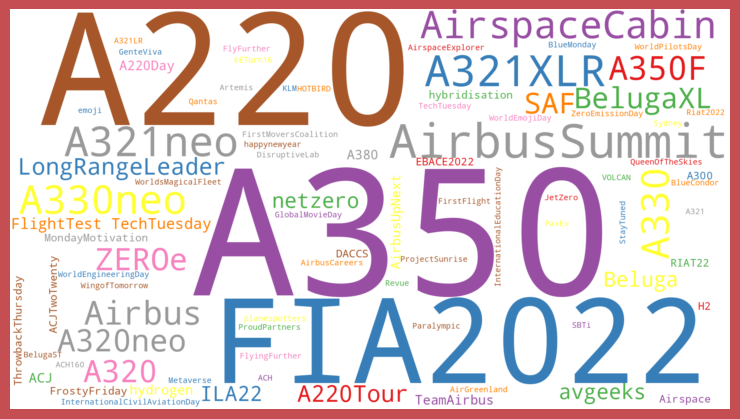

In [28]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
word_cloud = WordCloud(stopwords = stopwords, width = 1800, height = 1000, background_color = 'white', colormap = 'Set1').generate(' '.join(tags))

plt.figure(figsize=(8,4), facecolor='r')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Performing Sentiment Analysis

In [29]:
from textblob import TextBlob
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [30]:
df1 = tweets.copy()
df1['subjectivity'] = df1['Text'].apply(get_subjectivity)
df1['polarity'] = df1['Text'].apply(get_polarity)
df1.head(3)

,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,...,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time,subjectivity,polarity
0,1641446994534338570,📅 It's 3/30 aka #A330 Day! Flying on routes fr...,Airbus,en,"['A330', 'A330']",7,43,254,6,[Video(thumbnailUrl='https://pbs.twimg.com/med...,...,2023,3,March,30,Thursday,13,2023-03-30,14:27:14,0.500000,0.500000
1,1641402184444137473,📅 What day is it? It's 3/30 aka #A330 Day! Fin...,Airbus,en,"['A330', 'A330neo', 'Airspace']",9,49,318,8,[Video(thumbnailUrl='https://pbs.twimg.com/med...,...,2023,3,March,30,Thursday,13,2023-03-30,11:29:11,0.677273,0.318182
2,1641356455637925893,📅 What day is it? It's 3/30 aka #A330 Day! In ...,Airbus,en,['A330'],5,67,414,8,[Video(thumbnailUrl='https://pbs.twimg.com/med...,...,2023,3,March,30,Thursday,13,2023-03-30,08:27:28,0.577778,0.450000


In [31]:
df1['textblob_score'] = df1['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [32]:
neutral_threshold = 0.05

In [33]:
df1['textblob_sentiment'] = df1['textblob_score'].apply(lambda c:'positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral'))

In [34]:
textblob_df = df1[['Text', 'textblob_sentiment', 'LikeCount']]
textblob_df.head()

,Text,textblob_sentiment,LikeCount
0,📅 It's 3/30 aka #A330 Day! Flying on routes fr...,positive,254
1,📅 What day is it? It's 3/30 aka #A330 Day! Fin...,positive,318
2,📅 What day is it? It's 3/30 aka #A330 Day! In ...,positive,414
3,Welcome on board @Lufthansa! Great to see you ...,positive,203
4,What do Airbus and #Paralympic fencer @maximev...,Negative,87


In [35]:
textblob_df["textblob_sentiment"].value_counts()

positive    168
Neutral      37
Negative      7
Name: textblob_sentiment, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}>

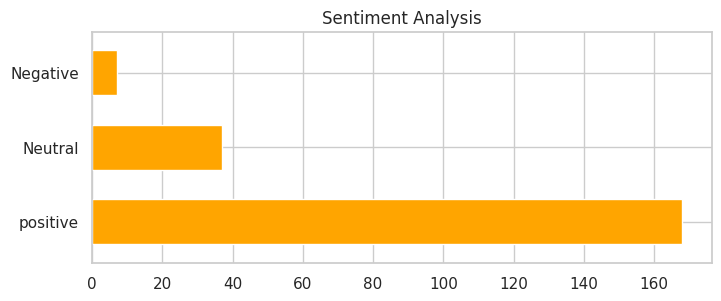

In [36]:
textblob_df["textblob_sentiment"].value_counts().plot.barh(title='Sentiment Analysis', color='orange', width=.6, figsize=(8,3), stacked = True)